In [2]:
import tensorflow as tf
import numpy as np

In [11]:
centigrados = np.array([-40, -10, 0, 8, 15, 22, 38, 45, 50, 60, 70, 80, 90, 100], dtype=float)

In [12]:
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100, 113, 122, 140, 158, 176, 194, 212], dtype=float)

In [5]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
oculta3 = tf.keras.layers.Dense(units=6)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2,oculta3, salida])

/home/tioner/Documentos/progra/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-25 12:21:18.506255: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
modelo.compile(
 optimizer= tf.keras.optimizers.Adam(0.1),
 loss = 'mean_squared_error'
)

In [7]:
print("Comenzando entrenamiento.....")
historial = modelo.fit(centigrados, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado")

Comenzando entrenamiento.....
Modelo entrenado


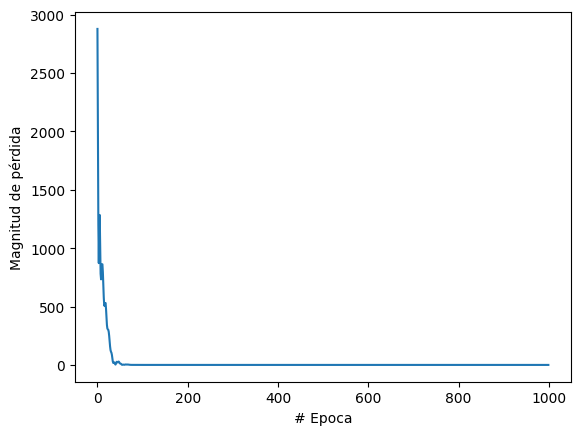

In [8]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [9]:
print("Hagamos una predicción!!!!")
resultado = modelo.predict(np.array([50.00]))
print("EL resultado es" + str (resultado) + "fahrenheit!")

Hagamos una predicción!!!!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
EL resultado es[[121.849976]]fahrenheit!


In [10]:
print("Variables internas del modelo")
print (oculta1.get_weights())
print (oculta2.get_weights())
print (salida.get_weights())

Variables internas del modelo
[array([[ 0.38385507, -0.43301657,  0.1498093 ]], dtype=float32), array([ 3.775069 , -3.7799606,  2.7488601], dtype=float32)]
[array([[-0.22524035,  0.21034816,  0.96924955],
       [ 0.3155039 , -1.2561918 , -0.4248137 ],
       [ 1.2985117 , -0.09812743,  0.85501474]], dtype=float32), array([0.81501806, 3.6568747 , 3.5917215 ], dtype=float32)]
[array([[0.07746308],
       [1.1451085 ],
       [1.6103837 ]], dtype=float32), array([3.4985666], dtype=float32)]
